# Classificação Iris com scikit-learn

Este notebook carrega `data.csv`, realiza pré-processamento, treina um classificador k-NN, avalia métricas e fornece uma função para predizer amostras arbitrárias.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### 1) Ler os dados

In [2]:
df = pd.read_csv('data.csv')
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2) Mapear species para inteiros (1, 2, 3)

In [3]:
pd.set_option('future.no_silent_downcasting', True) # tratamento de dados

mapping = {
    'Iris-setosa': 1,
    'Iris-versicolor': 2,
    'Iris-virginica': 3
}
df['species_int'] = df['species'].replace(mapping).astype('int64')
df[['species','species_int']].drop_duplicates()

,species,species_int
0,Iris-setosa,1
50,Iris-versicolor,2
100,Iris-virginica,3


### 3) Treinamento & Avaliação do modelo

Accuracy: 1.0
Classification report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



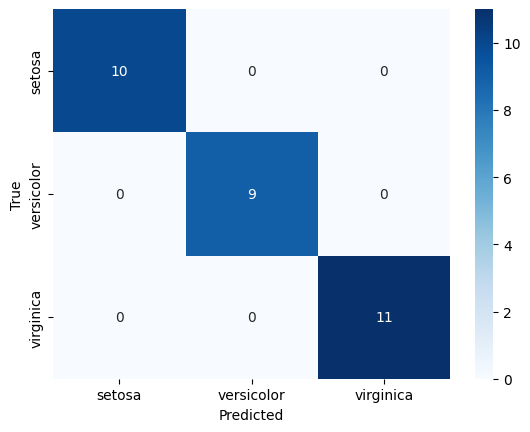

In [4]:
X = df[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values
y = df['species_int'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred, target_names=['setosa','versicolor','virginica']))

confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa','versicolor','virginica'], yticklabels=['setosa','versicolor','virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 4) Função para predizer amostras arbitrárias 
    recebe lista/array com 4 valores

In [5]:
def predict_sample(sample, model=knn, mapping_rev={1:'setosa',2:'versicolor',3:'virginica'}):
    arr = np.array(sample).reshape(1, -1)
    pred = model.predict(arr)[0]
    return mapping_rev.get(int(pred), str(pred))

print('Predicted:', predict_sample([5.1,3.5,1.4,0.2]))

Predicted: setosa
